In [11]:
#loading the packages
import pandas as pd
import json
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import spacy
from collections import Counter
import re
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import time
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm
from xgboost import XGBClassifier
from keras import regularizers
from keras.layers import Embedding
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Bidirectional
from keras.layers import Flatten, Dense, Dropout,SpatialDropout1D, Activation
from keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils import np_utils\
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils

In [2]:
#loading the data preprocessed accounting for linguistic nuances
common_df=pd.read_excel('common_df_clean.xlsx')

In [3]:
common_df.head()

,Unnamed: 0,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,new
0,0,fr_0497116,product_fr_0739436,reviewer_fr_0079605,1,le produit est noté comme livré depuis le jui...,Article non reçu !,fr,home,produit est noté comme livré depuis juillet...
1,1,fr_0014704,product_fr_0898711,reviewer_fr_0614903,1,pas terrible ce nai pas comme des faux cils na...,Rien ne vaut les vrais faux cils,fr,beauty,pas terrible ce nai pas comme faux cils natur...
2,2,fr_0851295,product_fr_0101306,reviewer_fr_0851899,1,je nai jamais reçu le produit,Jamais reçu,fr,home,je nai jamais reçu produit
3,3,fr_0148716,product_fr_0735028,reviewer_fr_0121344,1,appareil complètement inutile il peigne mais n...,Il ne coupe rien,fr,sports,appareil complètement inutile il peigne mais n...
4,4,fr_0689615,product_fr_0645938,reviewer_fr_0049041,1,à le bout de utilisations seulement la clé u...,Clé USB inutilisable,fr,pc,à bout utilisations seulement clé usb res...


In [5]:
#resetting the index for the data frame
common_df.reset_index(drop=True, inplace=True)

In [126]:
#one-hot encoding the target variable
label_encoder = preprocessing.LabelEncoder()
labels = label_encoder.fit_transform(common_df.language.values)
np.unique(labels)

array([0, 1, 2, 3])

In [127]:
#splitting the data into test and train
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(common_df.new.values, labels, test_size = 0.1,random_state=776)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test,y_val_and_test, test_size = 0.5,random_state=777)

In [128]:
#setting the maximum size and maximum length
VOCABULARY_SIZE = 1000000
MAX_LENGTH = 200

In [129]:
#tokenizing
tokenizer = Tokenizer(num_words=VOCABULARY_SIZE)
tokenizer.fit_on_texts(list(X_train) + list(X_test)+ list(X_val))

xtrain_sequence = tokenizer.texts_to_sequences(X_train)
xtest_sequence = tokenizer.texts_to_sequences(X_test)
xval_sequence = tokenizer.texts_to_sequences(X_val)

In [131]:
#padding
xtrain_padding = pad_sequences(xtrain_sequence, maxlen=MAX_LENGTH)
xtest_padding = pad_sequences(xtest_sequence, maxlen=MAX_LENGTH)
xval_padding = pad_sequences(xval_sequence, maxlen=MAX_LENGTH)
#word_index = tokenizer.word_index

In [132]:
#creating a matrix
ytrain_encode = np_utils.to_categorical(y_train)
ytest_encode = np_utils.to_categorical(y_test)
yval_encode = np_utils.to_categorical(y_val)

In [133]:
# creating abidirectional LSTM model
model_st_m = Sequential()
#embedding layer
model_st_m.add(Embedding(1000000,8,input_length=MAX_LENGTH))
model_st_m.add(Bidirectional(LSTM(100)))
model_st_m.add(Dense(4))
model_st_m.add(Activation('softmax'))
model_st_m.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [134]:
history_st_m = model_st_m.fit(xtrain_padding, y=ytrain_encode, batch_size=4000, epochs=12, verbose=1, validation_data=(xval_padding, yval_encode))


Epoch 1/12
185/185 [==============================] - 2607s 14s/step - loss: 0.6660 - accuracy: 0.8375 - val_loss: 0.1550 - val_accuracy: 0.9860
Epoch 2/12
185/185 [==============================] - 2400s 13s/step - loss: 0.0604 - accuracy: 0.9985 - val_loss: 0.0281 - val_accuracy: 0.9996
Epoch 3/12
185/185 [==============================] - 2391s 13s/step - loss: 0.0194 - accuracy: 0.9997 - val_loss: 0.0137 - val_accuracy: 0.9993
Epoch 4/12
185/185 [==============================] - 2385s 13s/step - loss: 0.0098 - accuracy: 0.9998 - val_loss: 0.0080 - val_accuracy: 0.9998
Epoch 5/12
185/185 [==============================] - 2393s 13s/step - loss: 0.0328 - accuracy: 0.9965 - val_loss: 0.0242 - val_accuracy: 0.9968
Epoch 6/12
185/185 [==============================] - 2394s 13s/step - loss: 0.0133 - accuracy: 0.9987 - val_loss: 0.0093 - val_accuracy: 0.9989
Epoch 7/12
185/185 [==============================] - 2394s 13s/step - loss: 0.0062 - accuracy: 0.9996 - val_loss: 0.0058 - val_ac

In [135]:
#using test set to compare against validation set and see if any overfitting occurs.
test_loss, test_acc = model_st_m.evaluate(xtest_padding, ytest_encode)
print('Test accuracy:', test_acc)

1282/1282 [==============================] - 277s 216ms/step - loss: 0.0022 - accuracy: 0.9998
Test accuracy: 0.9997560977935791


In [136]:
y_pred=model_st_m.predict(xtest_padding)
y_pred =(y_pred>0.5)

In [137]:
#classification report
print(classification_report(ytest_encode, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10277
           1       1.00      1.00      1.00     10262
           2       1.00      1.00      1.00     10154
           3       1.00      1.00      1.00     10303

   micro avg       1.00      1.00      1.00     40996
   macro avg       1.00      1.00      1.00     40996
weighted avg       1.00      1.00      1.00     40996
 samples avg       1.00      1.00      1.00     40996



In [138]:
training_loss = history_st_m.history['loss']
test_loss = history_st_m.history['val_loss']

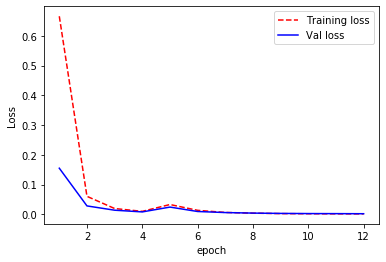

In [139]:
import matplotlib.pyplot as plt
#plotting the loss
epoch_count = range(1,len(training_loss) +1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss,'b-')
plt.legend(['Training loss', 'Val loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show();

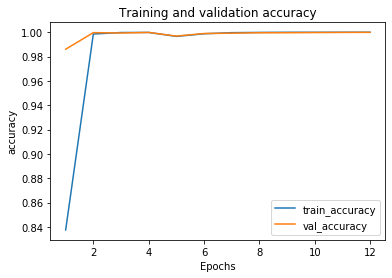

In [140]:
#plotting the accuracy
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
plot_metric(history_st_m, 'accuracy')

In [141]:
#presdictions for the 80 observations to compare aginst the other models performance on short data
tokenizer.fit_on_texts(short.review_body)
tokens_sequence = tokenizer.texts_to_sequences(short.review_body)
tokens_padding = pad_sequences(tokens_sequence, maxlen=MAX_LENGTH)
y_predict_new = (model_st_m.predict(tokens_padding)>0.5).astype('int32')
#y_predict =(y_pred>0.5)
y_predict_new=np.argmax(y_predict_new,1)
label_encoder.inverse_transform(y_predict_new)
#y_new=model_s.predict_classes(tokens_padding)

array(['de', 'de', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr',
       'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'de', 'es', 'es',
       'es', 'de', 'de', 'es', 'es', 'de', 'de', 'de', 'es', 'es', 'de',
       'es', 'es', 'de', 'es', 'en', 'de', 'de', 'de', 'de', 'de', 'de',
       'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de',
       'de', 'de', 'de', 'de', 'de', 'en', 'en', 'en', 'en', 'es', 'en',
       'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en',
       'en', 'en', 'en'], dtype=object)

In [142]:
#presdictions for the 80 observations to compare aginst the other models performance on short formal data
tokenizer.fit_on_texts(formal.txt)
tokens_sequence = tokenizer.texts_to_sequences(formal.txt)
tokens_padding = pad_sequences(tokens_sequence, maxlen=MAX_LENGTH)
y_predict_new = (model_st_m.predict(tokens_padding)>0.5).astype('int32')
#y_predict =(y_pred>0.5)
y_predict_new=np.argmax(y_predict_new,1)
label_encoder.inverse_transform(y_predict_new)
#y_new=model_s.predict_classes(tokens_padding)

array(['de', 'fr', 'fr', 'de', 'de', 'fr', 'de', 'de', 'de', 'es', 'fr',
       'fr', 'de', 'de', 'fr', 'fr', 'de', 'fr', 'fr', 'de', 'de', 'es',
       'es', 'en', 'de', 'de', 'es', 'de', 'de', 'es', 'en', 'es', 'de',
       'de', 'en', 'de', 'es', 'es', 'es', 'en', 'de', 'de', 'de', 'de',
       'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de',
       'de', 'de', 'de', 'de', 'de', 'en', 'en', 'en', 'en', 'en', 'fr',
       'en', 'de', 'en', 'en', 'en', 'de', 'en', 'de', 'en', 'en', 'en',
       'en', 'en', 'en'], dtype=object)

In [143]:
#presdictions for the 80 observations to compare aginst the other models performance on full formal data
tokenizer.fit_on_texts(formal_full.txt)
tokens_sequence = tokenizer.texts_to_sequences(formal_full.txt)
tokens_padding = pad_sequences(tokens_sequence, maxlen=MAX_LENGTH)
y_predict_new = (model_st_m.predict(tokens_padding)>0.5).astype('int32')
#y_predict =(y_pred>0.5)
y_predict_new=np.argmax(y_predict_new,1)
label_encoder.inverse_transform(y_predict_new)
#y_new=model_s.predict_classes(tokens_padding)

array(['de', 'fr', 'fr', 'fr', 'en', 'fr', 'de', 'fr', 'fr', 'fr', 'fr',
       'fr', 'fr', 'fr', 'de', 'fr', 'fr', 'fr', 'fr', 'fr', 'de', 'de',
       'es', 'es', 'es', 'es', 'es', 'es', 'de', 'es', 'es', 'es', 'es',
       'es', 'es', 'es', 'es', 'fr', 'es', 'es', 'de', 'de', 'de', 'de',
       'de', 'de', 'de', 'de', 'es', 'fr', 'de', 'de', 'de', 'de', 'de',
       'de', 'de', 'de', 'de', 'de', 'en', 'en', 'en', 'en', 'en', 'en',
       'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en',
       'en', 'en', 'en'], dtype=object)

In [144]:
#saving the model
from numpy import loadtxt
model_st_m.save("model.mil")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model.mil\assets
